# Exploratory Data Analysis

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Load and understand your data
- The data consists of 205 instances and 14 features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/Automobile_data1.csv')
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


### Check the number of null values in each column get a general description of your data

In [3]:
df.shape

(205, 14)

In [4]:
df.dtypes

symboling         int64
make             object
fuel-type        object
body-style       object
drive-wheels     object
wheel-base      float64
length          float64
width           float64
height          float64
horsepower        int64
peak-rpm          int64
highway-mpg       int64
city-mpg          int64
price             int64
dtype: object

In [5]:
df.describe()
df.isnull().sum()

symboling       0
make            0
fuel-type       0
body-style      0
drive-wheels    0
wheel-base      0
length          0
width           0
height          0
horsepower      0
peak-rpm        0
highway-mpg     0
city-mpg        0
price           0
dtype: int64

### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

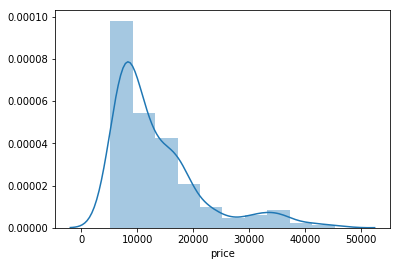

In [6]:
sns.distplot(df['price'],bins=10,kde=True)

In [7]:
skew(df['price'])

1.671975747887442

### Plot a countplot of the 'make' column of the dataset which represents the different car makers.

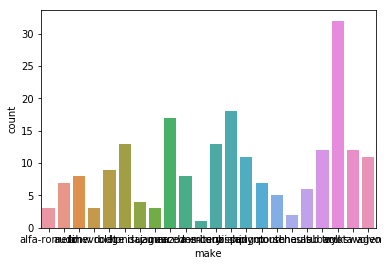

In [8]:
sns.countplot(df['make']) #by default takes 'make' as x which is not correct

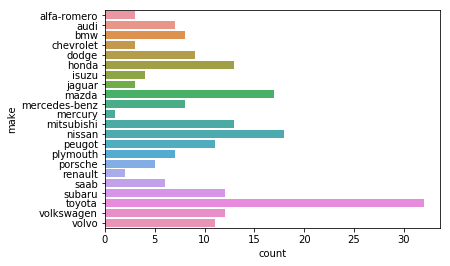

In [9]:
sns.countplot(y='make',data=df)

### Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

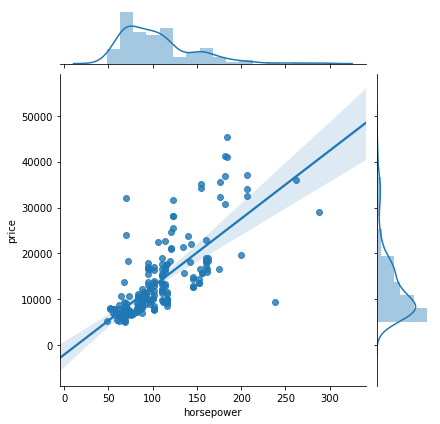

In [10]:
sns.jointplot(x='horsepower',y='price',data=df,kind='reg')

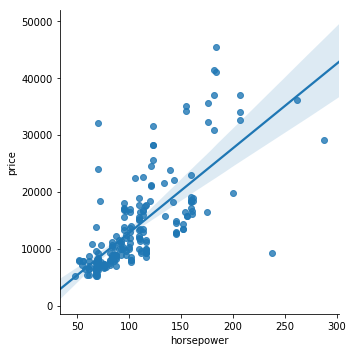

In [11]:
sns.lmplot(x='horsepower',y='price',data=df)

### Plot the insurance risk ratings for all the automobiles

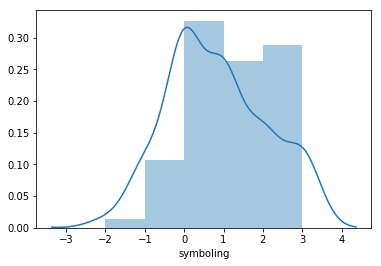

In [12]:
sns.distplot(df['symboling'],bins=5)

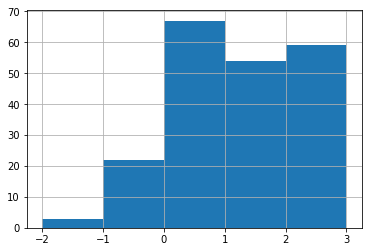

In [13]:
df['symboling'].hist(bins=5)

### Plot a pie chart of the fuel-type of the automobiles

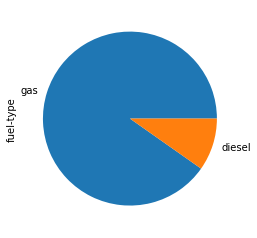

In [14]:
df['fuel-type'].value_counts().plot.pie()

### Plot the pearson correlation of all the features in a heatmap.

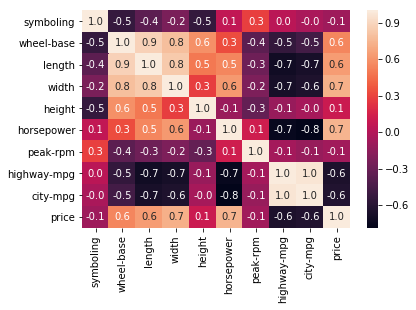

In [15]:
x = df.corr(method='pearson')
sns.heatmap(x,annot=True,fmt='.1f')

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

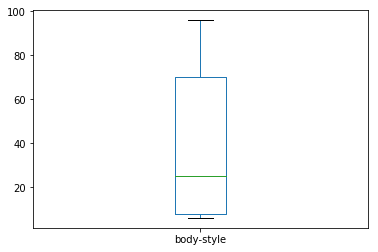

In [16]:
df['body-style'].value_counts().plot(kind='box')

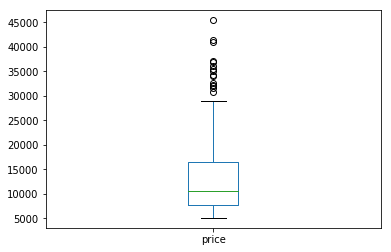

In [17]:
df['price'].plot(kind='box')

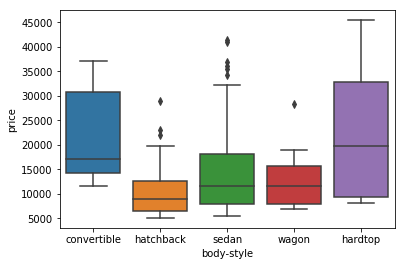

In [18]:
sns.boxplot(x='body-style',y='price',data=df)


### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

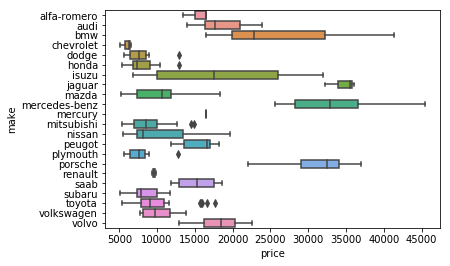

In [19]:
sns.boxplot(y='make',x='price',data=df)


## Data Preprocessing for the Automobile dataset

In [20]:
automobile = pd.read_csv('../data/Automobile_data.csv')
automobile.head()
#y = automobile[["price"]]
#automobile.drop("price",1,inplace=True)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Find out number of records having '?' value for normalized losses

In [21]:
len(automobile[automobile['normalized-losses']=='?'])

41

In [22]:
automobile[automobile['normalized-losses']=='?'].shape[0]

41

In [23]:
(automobile['normalized-losses']=='?').sum()

41

### Impute the missing values of the numerical data with mean of the column (`normalized-losses and horsepower`)  (Make sure you replace "?" by "NaN" for entire dataset before Imputing).

In [24]:
automobile.replace('?','NaN',inplace=True)
print(automobile.head())


   symboling normalized-losses         make fuel-type   body-style  \
0          3               NaN  alfa-romero       gas  convertible   
1          3               NaN  alfa-romero       gas  convertible   
2          1               NaN  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  

In [25]:
imp = Imputer(missing_values='NaN',strategy='mean')
automobile['normalized-losses'] = imp.fit_transform(np.array(automobile[['normalized-losses']]))
automobile['horsepower'] = imp.fit_transform(np.array(automobile[['horsepower']]))
automobile.head()


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450



### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [26]:
numeric_feature_auto=automobile._get_numeric_data().columns
for feature in numeric_feature_auto:
    print('Feature:{},Skewness:{:,.2f}'.format(feature,skew(automobile[feature])))


Feature:symboling,Skewness:0.21
Feature:normalized-losses,Skewness:0.85
Feature:width,Skewness:0.90
Feature:height,Skewness:0.06
Feature:engine-size,Skewness:1.93
Feature:horsepower,Skewness:1.39
Feature:city-mpg,Skewness:0.66
Feature:highway-mpg,Skewness:0.54
Feature:price,Skewness:1.79


In [30]:
for feature in numeric_feature_auto:
    if skew(automobile[feature]) > 1:
        automobile[feature] = np.sqrt(automobile[feature])

In [31]:
for feature in numeric_feature_auto:
    print('Feature: {}, Skewness: {:.2f}'.format(feature, skew(automobile[feature])))

Feature: symboling, Skewness: 0.21
Feature: normalized-losses, Skewness: 0.85
Feature: width, Skewness: 0.90
Feature: height, Skewness: 0.06
Feature: engine-size, Skewness: 1.09
Feature: horsepower, Skewness: 0.88
Feature: city-mpg, Skewness: 0.66
Feature: highway-mpg, Skewness: 0.54
Feature: price, Skewness: 0.93


### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [28]:
automobile['area'] = automobile['height']*automobile['width']
automobile.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,11.401754,10.535654,21,27,116.167982,3128.08
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,11.401754,10.535654,21,27,128.452326,3128.08
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,12.328828,12.409674,19,26,128.452326,3432.20
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,10.440307,10.099505,24,30,118.110118,3594.66
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,11.661904,10.723805,18,22,132.098448,3605.52


# scaling using max min and Standard slicer for engine size

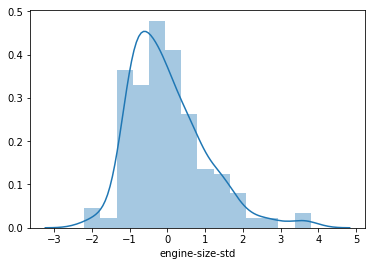

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
automobile['engine-size-std'] = scaler.fit_transform(automobile[['engine-size']])
sns.distplot(automobile['engine-size-std'])


###  Label Encode the categorical features.


In [33]:
df1 = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': ['b', 'b', 'c'], 'C': [1, 2, 3]})
df1

,A,B,C
0,a,b,1
1,b,b,2
2,c,c,3


In [34]:
df2 = pd.get_dummies(df1)
df2

,C,A_a,A_b,A_c,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,0,1,0
2,3,0,0,1,0,1


In [35]:
#Label Encoding

featsToEncode = list(automobile.select_dtypes(include = 'object'))
featsToEncode

['make',
 'fuel-type',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type']

In [36]:
def featEncoder(automobile):
    le = LabelEncoder()
    for feat in featsToEncode:
        try:
            automobile[feat] = le.fit_transform(automobile[feat])
        except:
            print('Error Encoding ', feat)
    return automobile

In [37]:
automobile = featEncoder(automobile)

In [38]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price,area,engine-size-std
0,3,122.0,0,1,0,2,0,64.1,48.8,0,3.376648,10.535654,21,27,10.778125,3128.08,0.197664
1,3,122.0,0,1,0,2,0,64.1,48.8,0,3.376648,10.535654,21,27,11.333681,3128.08,0.197664
2,1,122.0,0,1,2,2,0,65.5,52.4,5,3.511243,12.409674,19,26,11.333681,3432.20,0.752717
3,2,164.0,1,1,3,1,0,66.2,54.3,3,3.231146,10.099505,24,30,10.867848,3594.66,-0.402370
4,2,164.0,1,1,3,0,0,66.4,54.3,3,3.414953,10.723805,18,22,11.493409,3605.52,0.355628


### Split X and y into training and validation data and apply the Linear regression Model

In [40]:
X  = automobile.drop('price',1)
y = automobile['price']

### Split the Independent features and target(`price`) variable into X and y. 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

### Print the different evaluation metrics like Mean Squared error, R2 Score, Mean Absolute Error and RMSE

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error: ",mean_squared_error(y_pred, y_val))
print("R2 Score: ",r2_score(y_pred, y_val))
print("Mean Absolute Error: ",mean_absolute_error(y_pred, y_val))
print("RMSE: ",np.sqrt(mean_squared_error(y_pred, y_val)))

Mean Squared Error:  0.5946972782779173
R2 Score:  0.7241947754930007
Mean Absolute Error:  0.4600125432549482
RMSE:  0.7711661807145833


# Thank You
***
### Next Session: Logistic Regression
For more queries - Reach out to academics@greyatom.com 